# Beat tracking error visualisation

The purpose of this document is to visualise the output of several beat-tracking algorithms on the Jazzomat database.

To actually run the beat trackers, please look at "Using the beat trackers.ipynb".

<IPython.core.display.Javascript object>


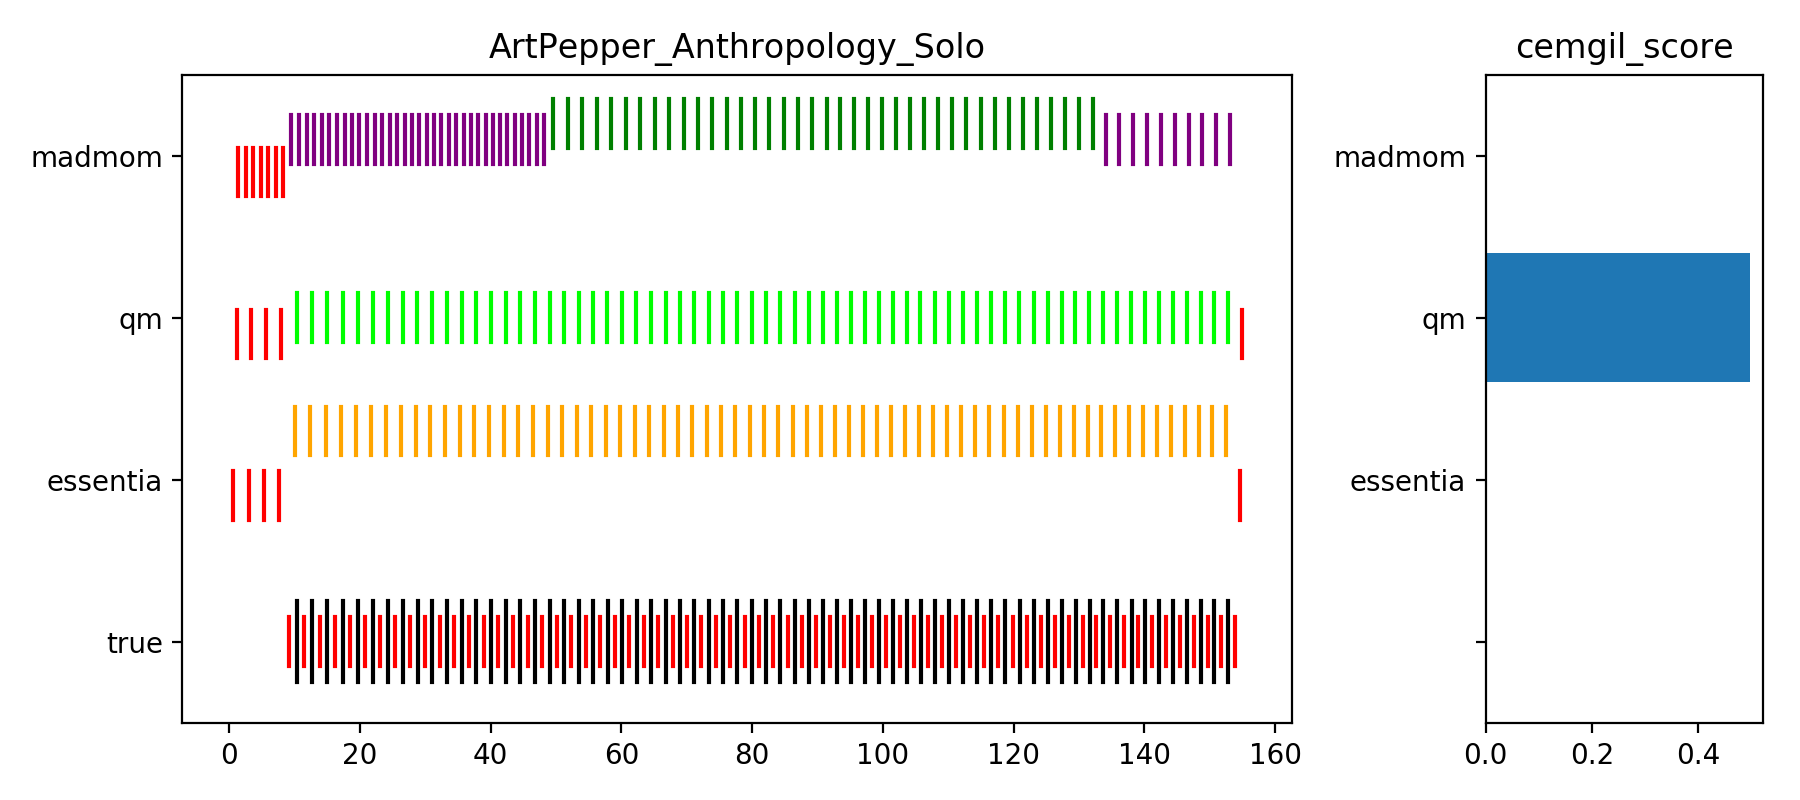

In [11]:
# Imports
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import widgets, interactive, interact
%matplotlib notebook
import numpy as np
import pandas as pd
import tracker
reload(tracker)

# Load important metadata into tables in the 'beat' object.
myObj = tracker.Beat()
myObj.load_metadata('solo_info')
myObj.load_metadata('transcription_info')
myObj.load_metadata('track_info')
song_choices = {myObj.transcription_info.filename_solo.loc[melid]:
    myObj.transcription_info.melid.loc[melid] for melid in myObj.transcription_info.index}
metric_list = ['f-measure','goto','p-score','info_gain','cemgil_score', 'cemgil_max', 'CMLc', 'CMLt', 'AMLc', 'AMLt', 'median period', 'median phase']
    
def plot_wrapper_from_widgets(beat_plot_widget):
    solofilename = song_selection_widget.value
    scale = beat_scale_widget.value
    thresh_val = thresh_val_widget.value
    thresh_rule = thresh_mode_widget.value
    fig_handle = 'Comparison of beat tracking outputs'
    plt.figure(fig_handle, figsize = [9,4])
    eval_metric_index = metric_list.index(eval_metric_widget.value)
    tracker.plot_all_from_melid(myObj, solofilename, scale, thresh_val, thresh_rule, fig_handle, eval_metric_index)

song_selection_widget = widgets.Dropdown(options=sorted(song_choices.keys()),
    description='Solo list',layout={'width':'50%'})
thresh_mode_widget = widgets.Dropdown(options=['relative','absolute'], description='Evaluation')
thresh_val_widget = widgets.BoundedFloatText(min=0.01, max=10, step=0.01, value=0.1, description="Threshold")
beat_scale_widget = widgets.Dropdown(options=['Beat','Downbeat'], value='Downbeat', description='Time scale')
beat_plot_widget = widgets.Button(description='Plot Beat Tracking Results',button_style='danger',layout={'width':'50%'})
eval_metric_widget = widgets.Dropdown(options=metric_list, value="f-measure", description="Eval. metric")
beat_plot_widget.on_click(plot_wrapper_from_widgets)

# Container that contains all widgets
container = widgets.VBox(children=[song_selection_widget,
    widgets.HBox(children=[thresh_mode_widget, thresh_val_widget, beat_scale_widget, eval_metric_widget]),
    beat_plot_widget])

display(container)

<IPython.core.display.Javascript object>


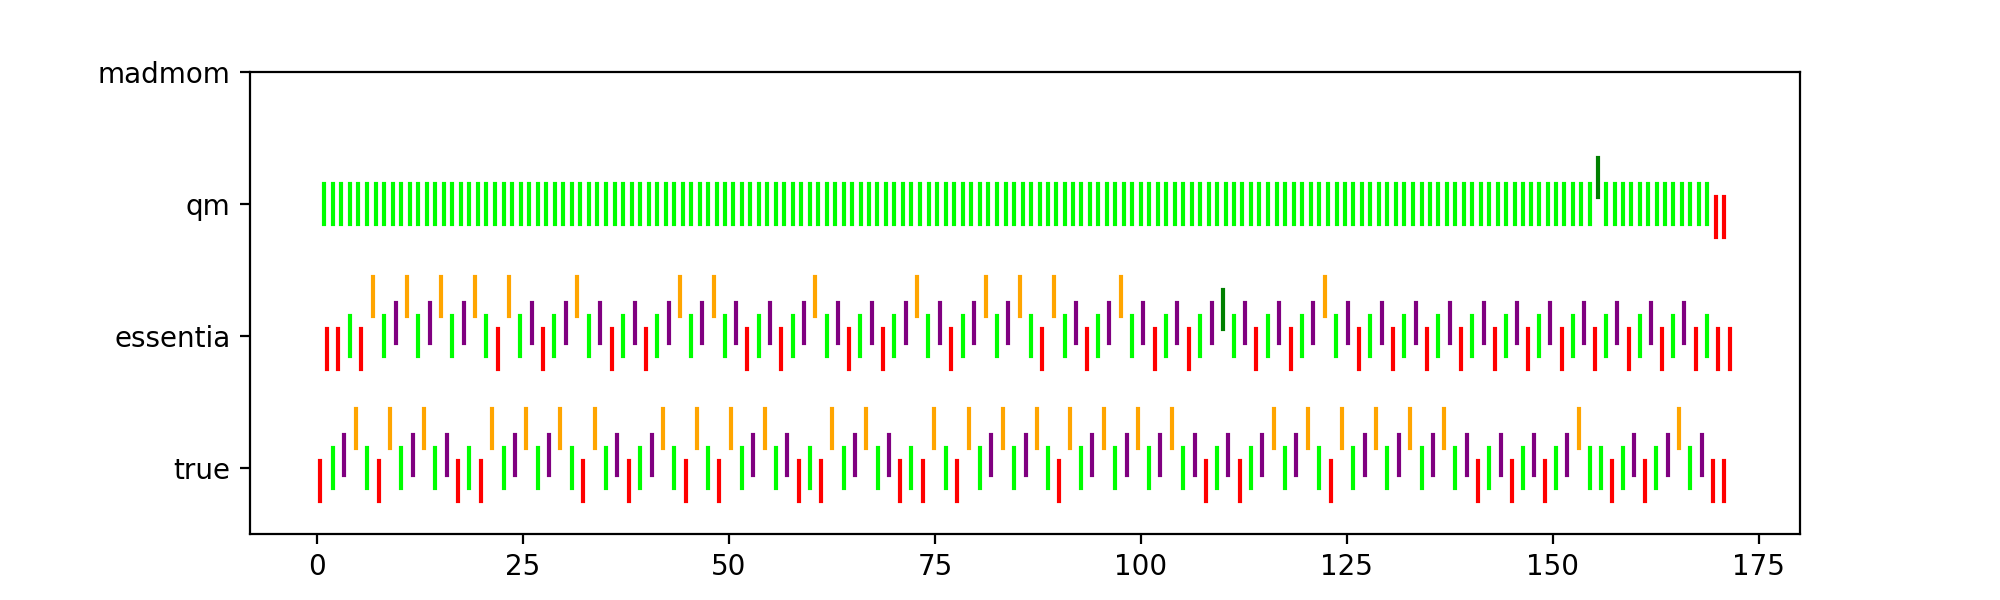

([<matplotlib.axis.YTick at 0x13430a290>,
 <a list of 3 Text yticklabel objects>)

In [14]:
myObj.ind=50
myObj.load_true_beats_and_downbeats()
myObj.load_estimates()

fig_handle='tmp_plot'
plt.figure(fig_handle, figsize = [10,3])
error_codes = [-1, 0, 1, 2, 3]
# error_colors = ['red','#00a000','#a0a000','#006000','#00a0a0']
error_names = ['Wrong', 'Perfect', '+Q', 'Half', '-Q']
error_colors = ['red', '#00FF00', 'purple', 'green', 'orange']
extension_types = [k for k in myObj.beats.keys() if k is not 'true']
for ext_i, ext_type in enumerate(extension_types):
    est_times = myObj.beats[ext_type].downbeats()
    tru_times = myObj.beats['true'].downbeats()# beat_onset()
    dists, errs = tracker.compare_times(est_times, tru_times,
                                        thresh=.1, thresh_rule='relative')
    for type_i,color in zip(error_codes, error_colors):
        times_subset = [est_times[i] for i in range(len(est_times)) if errs[i]==type_i]
        tracker.plot_beats_at_height(times_subset, y=ext_i+type_i*.1, h=0.3, color=color, fig_handle=fig_handle)
plt.ylim([-.5, 2.5])
plt.yticks(range(3), extension_types)

In [15]:
# Pick a melid
melid = 4
myObj.ind = melid
myObj.load_true_beats_and_downbeats()
myObj.load_estimates()
scores = myObj.evaluate_estimates()
# print beat.transcription_info[beat.transcription_info.melid==melid][["melid","filename_solo"]]

In [16]:
extype='essentia'
beat_set = myObj.beats
beat_set[extype].df(1).dist_to_db
beat_set[extype].db_errors[beat_set[extype].beat==1]

array([-1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
       -1.])

In [19]:
# beat.beats['madmom'].downbeats()
# tracker.plot_beats(beat.beats['madmom'].downbeats(), color='k')
# tracker.plot_beats(beat.beats['true'].downbeats(), y=1, color='#000070')
tracker.plot_all_beats(myObj.beats,'db')
# beat.beats['madmom'].dist_to_db


In [20]:
myObj.beats['madmom'].downbeats()
# tracker.plot_beats(myObjbeats['madmom'].downbeats(), color='k')
# tracker.plot_beats(myObjbeats['true'].downbeats(), y=1, color='#000070')
tracker.plot_all_beats(myObj.beats,'db')
# myObjbeats['madmom'].dist_to_db

In [21]:
reload(tracker)
beat=tracker.Beat()
melid = 25
myObj.ind = melid
myObj.load_true_beats_and_downbeats()
myObj.load_estimates()
myObj.evaluate_estimates()

# right_set = beat_set[extype].beat_onset[beat_set[extype].dist_to_beat<0.1]
# right_set
# myObj.beats['essentia'].df(True)
# ex_types = [x for x in beat_set.keys() if x is not 'true']
# print ex_types

# SET UP RIGHT TICKS, WITH ACCURACY OVERALL?

({'essentia': [0.7492625368731562,
   1.0,
   0.9190751445086706,
   0.2897621231362511,
   0.5346629546817205,
   0.5346629546817205,
   0.27167630057803466,
   0.8901734104046243,
   0.27167630057803466,
   0.8901734104046243],
  'madmom': [0.7683284457478005,
   1.0,
   0.9485714285714286,
   0.3363552334705718,
   0.5669392939623643,
   0.5669392939623643,
   0.5371428571428571,
   0.9371428571428572,
   0.5371428571428571,
   0.9371428571428572],
  'qm': [0.7331378299120235,
   1.0,
   0.9314285714285714,
   0.3001748180546103,
   0.5174983676491948,
   0.5174983676491948,
   0.5371428571428571,
   0.8971428571428571,
   0.5371428571428571,
   0.8971428571428571]},
 {'essentia': [0.4470588235294118,
   0.0,
   0.5454545454545454,
   0.39812840422081186,
   0.318172494104409,
   0.318172494104409,
   0.5227272727272727,
   0.5227272727272727,
   0.5227272727272727,
   0.5227272727272727],
  'madmom': [0.7764705882352942,
   1.0,
   0.9318181818181818,
   0.6534812145180164,
   0.53

In [22]:
extype='qm'
len(beat_set[extype].dist_to_db[beat_set[extype].beat==1])
len(beat_set[extype].downbeats())+4

48

In [23]:
extype='qm'
len(beat_set[extype].dist_to_db[beat_set[extype].beat==1])
len(beat_set[extype].downbeats())+4

48

In [25]:
# Evaluation by hand:

# beat level:
myObj.load_true_beats_and_downbeats(melid)
scores = tracker.get_scores(ref_beats = myObj.beats['true'].beat_onset,
                            est_beats = myObj.beats['qm'].beat_onset)

# get_scores returns: [f_measure, goto, p_score, information_gain] + list(cemgil) + list(continuity)
# (there are 2 values in cemgil and 4 in continuity)

# downbeat level:
scores_db = tracker.get_scores(ref_beats = myObj.beats['true'].downbeats(),
                               est_beats = myObj.beats['qm'].downbeats())

print scores
print scores_db

[0.7331378299120235, 1.0, 0.9314285714285714, 0.3001748180546103, 0.5174983676491948, 0.5174983676491948, 0.5371428571428571, 0.8971428571428571, 0.5371428571428571, 0.8971428571428571]
[0.7529411764705882, 1.0, 0.9318181818181818, 0.6550152382935647, 0.49479516138208723, 0.49479516138208723, 0.9318181818181818, 0.9318181818181818, 0.9318181818181818, 0.9318181818181818]
